In [43]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, "../") 

from importlib import reload
from tblib import lattice
from tblib import hamiltonian
from tblib import plotting
from tblib import sc_AHM

reload(lattice)
reload(hamiltonian)
reload(plotting)
reload(sc_AHM)

<module 'tblib.sc_AHM' from 'c:\\Users\\atsch\\Desktop\\MasterVorlesungen\\Masterthesis\\Code\\tests\\..\\tblib\\sc_AHM.py'>

# Test of self consistency
- selfconsistent calculation of meanfield cooper and hatree-fock channels
- plots show evolution of those for each site group (dDSL), filling factor $\nu$ and chemical potential $\mu$
- Band structure and DOS shown for additional verification

In [44]:
N=2
m = -0.2
lat = lattice.dDiagonallyStripedLattice(N=N)
ham = hamiltonian.Model(N=N, kind='dDSL', delta=[0.1,0.1], T=0, U=[1,1], nu=3, ns=[1,1], mu=[m,m])

In [45]:
dels, nus, mus = sc_AHM.self_consistency_loop(ham, 21, HF=True, Nmax=300, alpha=0.3, g=1e-4)

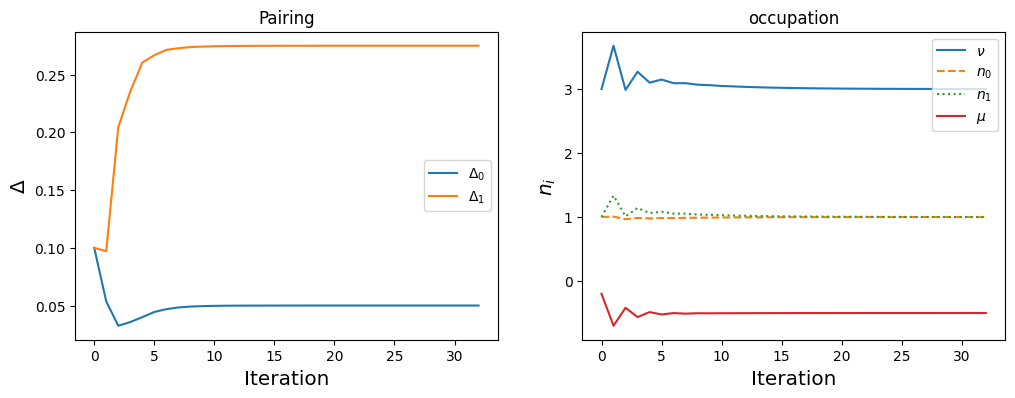

In [46]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(12,4))
axes[0].set_title('Pairing')
axes[1].set_title('occupation')

axes[0].set_xlabel('Iteration', size='x-large')
axes[0].set_ylabel(r'$\Delta$', size='x-large')
#axes[0].set_xticks(size='x-large')
#axes[0].set_yticks(size='x-large')

axes[1].set_xlabel('Iteration', size='x-large')
axes[1].set_ylabel(r'$n_i$', size='x-large')
#axes[1].set_xticks(size='x-large')
#axes[1].set_yticks(size='x-large')


for i,d in enumerate(dels):
    ax0 = axes[0].plot(np.arange(len(dels[0])), np.real(d), label = f'$\Delta_{i}$')

s1 = [np.sum(nus[:,i])+nus[1,i] for i in range(np.shape(nus)[1])]
colors=['dashed', 'dotted', 'dashdot']

axes[1].plot(np.arange(len(s1)), s1, label = r'$\nu$')
for i in range(2):
    ax1 = axes[1].plot(np.arange(len(s1)),nus[i],linestyle=colors[i], label=f'$n_{i}$')
axes[1].plot(np.arange(len(s1)),mus[0], label=r'$\mu$')

   
axes[0].legend()
axes[1].legend()
plt.show()

In [47]:
ham.delta

array([0.0500619 -7.75323621e-34j, 0.27503086-1.44580742e-33j])

In [48]:
plotting.plot_bands(ham.Hk(0,0, kinetic_only=True))

TypeError: 'numpy.ndarray' object is not callable

In [26]:
ham.delta

array([0.05014633-9.42624878e-35j, 0.27507308-8.78869222e-34j])

In [12]:
ham.ns

array([0.99999787-1.58928554e-32j, 1.00000769-5.56035272e-34j])

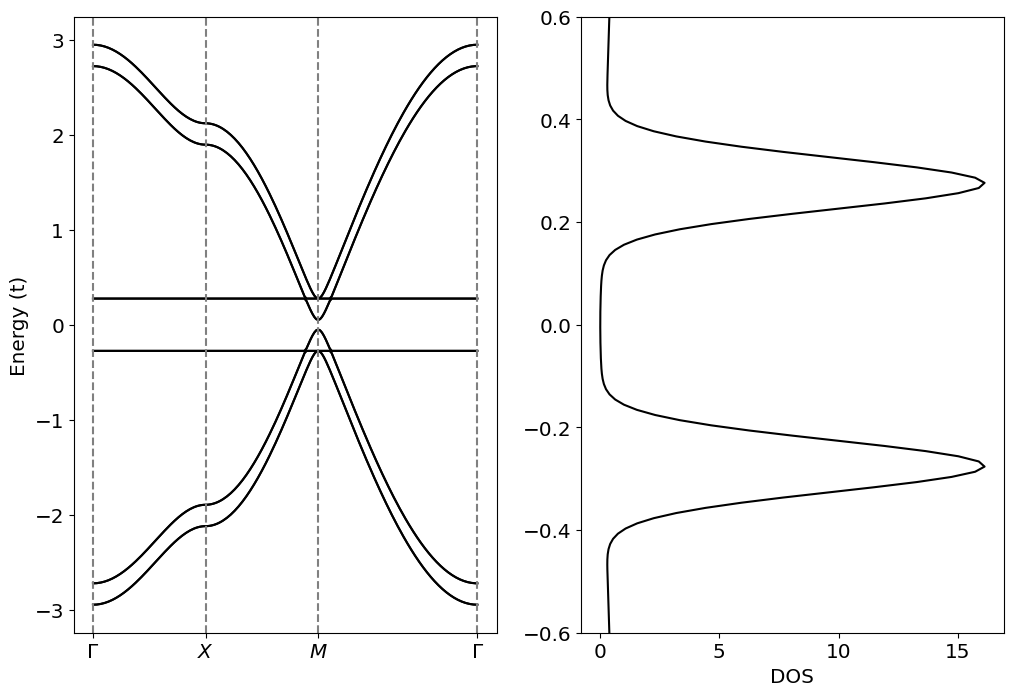

In [223]:
H = ham.Hk

fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(12,8))
# Create two subplots and unpack the output array immediately

axes[0] = plotting.plot_bands(H, s=(1,1), hsp_path='GXMG', ax=axes[0])
axes[1] = plotting.plot_DOS(H, s=(1,1), sig=0.05, ax=axes[1], ylim=0.6, ylabel=None)

In [ ]:
delarr = []
Uarr = np.arange(0,10,0.5)
for U in Uarr:
    m = -U/2
    ham = hamiltonian.Model(N=N, kind='dDSL', delta=[1,1], T=0, U=[U,U], nu=3, ns=[1,1], mu=[m,m])
    dels, nus, mus = sc_AHM.self_consistency_loop(ham, 41, HF=True, Nmax=200)
    delarr.append(dels[:,-1])

C:\Users\atsch\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


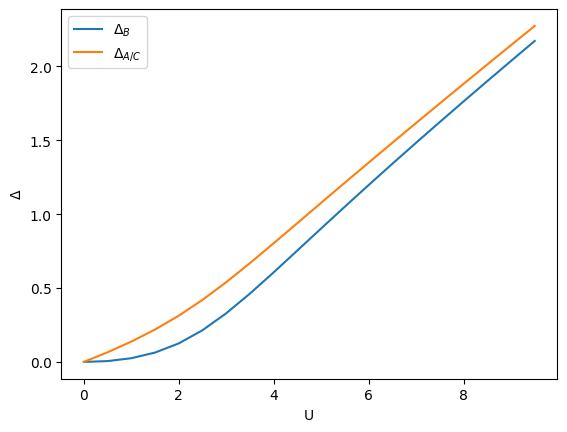

In [271]:
plt.xlabel('U')
plt.ylabel(r'$\Delta$')
plt.plot(Uarr, [delarr[i]*U/2 for i,U in enumerate(Uarr)], label=[r'$\Delta_B$', r'$\Delta_{A/C}$'])
plt.legend()